# UHI figure
- This script is used to visualize UHI mean data;
- Simulations: CNTL, ROOF_0.9, ROOF_DA;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
#case0: CNTL
file_path0 = 'exported_data_UHI0.csv'
df0 = pd.read_csv(file_path0)
for column_name in df0.columns:
    globals()[column_name] = df0[column_name]

In [3]:
#case1: ROOF_0.9
file_path1 = 'exported_data_UHI1.csv'
df1 = pd.read_csv(file_path1)
for column_name in df1.columns:
    globals()[column_name] = df1[column_name]

In [4]:
#case2: ROOF_DA
file_path2 = 'exported_data_UHI2.csv'
df2 = pd.read_csv(file_path2)
for column_name in df2.columns:
    globals()[column_name] = df2[column_name]

In [5]:
# drawing
start_year = 2015
end_year = 2099
linewidth = 0.5
linewidth2 = 1
fontsize = 6
labelfont = 6
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2099]
alpha=0.075
handletextpad = 0.5
pad = 1
xwidth = 0.75
length = 4
data = [[Arr_CUHI_0,Arr_CUHI_1,Arr_CUHI_2],
        [Arr_CUHI_0_JJA,Arr_CUHI_1_JJA,Arr_CUHI_2_JJA],
        [Arr_CUHI_0_DJF, Arr_CUHI_1_DJF, Arr_CUHI_2_DJF],
        [Arr_SUHI_0, Arr_SUHI_1, Arr_SUHI_2],
        [Arr_SUHI_0_JJA, Arr_SUHI_1_JJA, Arr_SUHI_2_JJA],
        [Arr_SUHI_0_DJF, Arr_SUHI_1_DJF, Arr_SUHI_2_DJF]]

label = ['CNTL','ROOF_0.9','ROOF_DA', 'Near-term', 'Mid-term', 'Long-term']
lc = [lc1, lc3, lc7, lc9, lc5, lc2]
padding = 4
title = ['(a) CUHII - ANN', '(b) CUHII - JJA', '(c) CUHII - DJF', '(d) SUHII - ANN', '(e) SUHII - JJA', '(f) SUHII - DJF']
ymin = -2
ymax = 2
term_1 = [2021, 2041, 2081]
term_2 = [2040, 2060, 2100]
delta = [Arr_CUHI_1-Arr_CUHI_0, Arr_CUHI_1_JJA-Arr_CUHI_0_JJA,Arr_CUHI_1_DJF-Arr_CUHI_0_DJF,
         Arr_SUHI_1-Arr_SUHI_0, Arr_SUHI_1_JJA-Arr_SUHI_0_JJA,Arr_SUHI_1_DJF-Arr_SUHI_0_DJF]
scatter = [2043, 2044, 2048]
sizes = 2

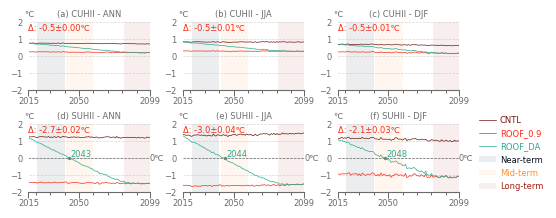

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(5.5, 2))
ax = axes.flatten()
for i in range(6):
    for j in range(3):
        ax[i].plot(time, data[i][j], linewidth=linewidth,label = label[j],color=lc[j])
    for m in range(3):    
        ax[i].fill_betweenx([ymin, ymax],term_1[m], term_2[m], color=lc[m+3], alpha=alpha, label=label[m+3], edgecolor='none')
    ax[i].set_title(title[i],fontsize=fontsize,color=labelcolor, pad = padding)
    ax[i].set_xlim(start_year,end_year)
    ax[i].ticklabel_format(style='scientific', scilimits=(0,0), axis='y')
    ax[i].tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor, labelsize=labelfont,pad=pad, color = labelcolor, width = xwidth)
    ax[i].tick_params(axis='x', which='major', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,labelsize=labelfont,pad=pad, color = labelcolor, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='minor', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,labelsize=labelfont,pad=pad, color = labelcolor, width = xwidth, length = length/2)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_color(labelcolor)
    ax[i].xaxis.set_minor_locator(minor_locator)
    ax[i].set_xticks(specific_years)
    ax[i].grid(True, which='major', axis='y',linestyle='--',linewidth=linewidth, alpha=0.5)
    ax[i].set_ylim(ymin, ymax)
    ax[i].set_ylabel('℃', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax[i].yaxis.set_label_coords(0, 1.05)
    ax[i].text(2015, ymax-0.5,'Δ: ' + str("{:.1f}".format(delta[i].mean())) + '±' + str("{:.2f}".format(delta[i].std()))+'℃', fontsize=labelfont, color=lc3)

for m in [3,4,5]:
    ax[m].hlines(y=0, xmin=min(time), xmax=max(time), linewidth=linewidth, color=labelcolor, linestyle='--')
    ax[m].text(max(time), 0, '0℃', verticalalignment='center', fontsize=labelfont, color=labelcolor)
    ax[m].scatter(scatter[m-3], 0, color=lc7, s=sizes)
    ax[m].text(scatter[m-3]+1, 0.1, str(scatter[m-3]), fontsize=labelfont, color=lc7)

lines, labels = ax[0].get_legend_handles_labels()
                  
plt.subplots_adjust(left=0.0425, right=0.825, bottom=0.075, top=0.925, wspace=0.275, hspace=0.5)
legend = fig.legend(lines, labels, bbox_to_anchor=(0.992, 0.045), loc='lower right', frameon=False, handletextpad=handletextpad, fontsize=labelfont, ncol=1)

for i, text in enumerate(legend.get_texts()):
    text.set_color(lc[i])

plt.show()
fig.savefig('UHI.png', dpi=300)

In [11]:
fig.savefig('UHI.pdf', dpi=600)

# Description

In [11]:
print(Arr_CUHI_0.mean(), Arr_CUHI_0.std())

0.739993148691514 0.017445129113204047


In [11]:
print(Arr_SUHI_0.mean(), Arr_SUHI_0.std())

1.2249098357032326 0.026241438446876812


In [13]:
print((Arr_CUHI_0_JJA-Arr_CUHI_0_DJF).mean(), (Arr_CUHI_0_JJA-Arr_CUHI_0_DJF).std())

0.1661257210899802 0.0320752023073878


In [14]:
print(Arr_SUHI_0.mean(), Arr_SUHI_0.std())

1.2249098357032326 0.026241438446876812


In [15]:
print((Arr_SUHI_0 - Arr_SUHI_1).mean(), (Arr_SUHI_0 - Arr_SUHI_1).std())

2.689259444966036 0.022560547370261003


In [11]:
print(Arr_SUHI_1_JJA[84], Arr_SUHI_1_DJF[84])

-1.5255640745162964 -1.073380470275879


In [5]:
print(Arr_CUHI_0[0], Arr_CUHI_2[0])

0.7666338086128235 0.7571877837181091


In [6]:
print(Arr_CUHI_1[84], Arr_CUHI_2[84])

0.2007991969585418 0.2008462846279144


In [16]:
print((Arr_SUHI_0_JJA - Arr_SUHI_1_JJA).mean(), (Arr_SUHI_0_JJA - Arr_SUHI_1_JJA).std())

2.9850667785195744 0.04319808793131076


In [17]:
print((Arr_SUHI_0_DJF - Arr_SUHI_1_DJF).mean(), (Arr_SUHI_0_DJF - Arr_SUHI_1_DJF).std())

2.1203786737778607 0.03470798509699345


In [8]:
print(Arr_CUHI_0.mean(), Arr_CUHI_1.mean())

0.739993148691514 0.22510266216362224


In [7]:
print((Arr_CUHI_0_JJA - Arr_CUHI_1_JJA).mean(), (Arr_CUHI_0_DJF - Arr_CUHI_1_DJF).mean())

0.5373767386464512 0.4540807333062677


In [9]:
print(Arr_SUHI_0.mean(), Arr_SUHI_1.mean())

1.2249098357032326 -1.464349609262803


In [10]:
print((Arr_CUHI_0 - Arr_CUHI_1).mean(), (Arr_CUHI_0 - Arr_CUHI_1).std())

0.5148904865278917 0.004590386803408559


In [8]:
print(Arr_SUHI_0[0], Arr_SUHI_2[0])

1.267232060432434 1.2071272134780884


In [9]:
print(Arr_SUHI_1[84], Arr_SUHI_2[84])

-1.4878685474395752 -1.4877849817276


In [13]:
Arr_SUHI_2[28] # 2015 + 28 = 2043

-0.0127283846959471

In [7]:
Arr_SUHI_2_JJA[29] # 2015 + 29 = 2044

-0.0807048603892326

In [30]:
Arr_SUHI_2_DJF[33] # 2015 + 33 = 2048

-0.0180435609072446

In [10]:
print(delta[0].mean(), delta[1].mean(), delta[2].mean())

-0.5148904865278917 -0.5373767386464512 -0.4540807333062677
